In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
plant1_gen = pd.read_csv('D:\sem5\de\mini_project\Plant_1_Generation_Data.csv') 
plant2_gen = pd.read_csv('D:\sem5\de\mini_project\Plant_2_Generation_Data.csv')

In [6]:
plant1_sens = pd.read_csv('D:\sem5\de\mini_project\Plant_1_Weather_Sensor_Data.csv')
plant2_sens = pd.read_csv('D:\sem5\de\mini_project\Plant_2_Weather_Sensor_Data.csv')

In [7]:
plant1_gen

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [8]:
plant2_gen

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1      2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2      2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3      2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4      2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                    ...       ...              ...       ...       ...   
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD   TOTAL_YIELD  
0      9425.000000  2.429011e+06  
1         0.000000  1.215279e+09  
2      3075.333333  2.247720e+09  
3       269.933333  1.704250e+06  
4      3177.000000  1.994153e+07  
...            ...           ...  
67693  4157.000000  5.207580e+05  
67694  3931.000000  1.211314e+08  
67695  4322.000000  2.427691e+06  
67696  4218.000000  1.068964e+08  
67697  4316.000000  2.093357e+08  

[67698 rows x 7 columns]

Summation of yield

In [9]:
plant1_gendaily = plant1_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_gendaily

DATE_TIME  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD
0     01-06-2020 00:00       0.0       0.0    5407.250000  153519480.0
1     01-06-2020 00:15       0.0       0.0       0.000000  153519480.0
2     01-06-2020 00:30       0.0       0.0       0.000000  153519480.0
3     01-06-2020 00:45       0.0       0.0       0.000000  153519480.0
4     01-06-2020 01:00       0.0       0.0       0.000000  153519480.0
...                ...       ...       ...            ...          ...
3153  31-05-2020 22:45       0.0       0.0  125291.000000  153519480.0
3154  31-05-2020 23:00       0.0       0.0  125291.000000  153519480.0
3155  31-05-2020 23:15       0.0       0.0  125291.000000  153519480.0
3156  31-05-2020 23:30       0.0       0.0  125291.000000  153519480.0
3157  31-05-2020 23:45       0.0       0.0  113737.142857  153519480.0

[3158 rows x 5 columns]

In [10]:
plant2_gendaily = plant2_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_gendaily

DATE_TIME  DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD
0     2020-05-15 00:00:00       0.0       0.0  48899.938095  1.418960e+10
1     2020-05-15 00:15:00       0.0       0.0  28401.000000  1.418960e+10
2     2020-05-15 00:30:00       0.0       0.0  28401.000000  1.418960e+10
3     2020-05-15 00:45:00       0.0       0.0  28401.000000  1.418960e+10
4     2020-05-15 01:00:00       0.0       0.0  26516.000000  1.418960e+10
...                   ...       ...       ...           ...           ...
3254  2020-06-17 22:45:00       0.0       0.0  93040.000000  1.419408e+10
3255  2020-06-17 23:00:00       0.0       0.0  93040.000000  1.419408e+10
3256  2020-06-17 23:15:00       0.0       0.0  93040.000000  1.419408e+10
3257  2020-06-17 23:30:00       0.0       0.0  93040.000000  1.419408e+10
3258  2020-06-17 23:45:00       0.0       0.0  93040.000000  1.419408e+10

[3259 rows x 5 columns]

In [29]:
# Plant 1 generation data
plant1_gendaily['DATE_TIME'] = pd.to_datetime(plant1_gendaily['DATE_TIME'], format='%d-%m-%Y %H:%M')  # Convert to datetime with correct format
plant1_gendaily['TIME'] = plant1_gendaily['DATE_TIME'].dt.time  # Extract time from datetime
plant1_gendaily['DATE'] = plant1_gendaily['DATE_TIME'].dt.date  # Extract date from datetime

# Plant 2 generation data
plant2_gendaily['DATE_TIME'] = pd.to_datetime(plant2_gendaily['DATE_TIME'])  # Convert to datetime without specifying format (auto-infer)
plant2_gendaily['TIME'] = plant2_gendaily['DATE_TIME'].dt.time  # Extract time from datetime
plant2_gendaily['DATE'] = plant2_gendaily['DATE_TIME'].dt.date  # Extract date from datetime


In [30]:
plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [31]:
plant2_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [32]:
plant1_gendaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   TIME         3158 non-null   object        
 6   DATE         3158 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 172.8+ KB


In [33]:
plant1_gendaily.describe()

DATE_TIME       DC_POWER      AC_POWER  \
count                           3158    3158.000000   3158.000000   
mean   2020-06-01 06:42:44.344521728   68547.713729   6703.628149   
min              2020-05-15 00:00:00       0.000000      0.000000   
25%              2020-05-23 23:18:45       0.000000      0.000000   
50%              2020-06-01 12:37:30    8515.285714    823.033036   
75%              2020-06-09 17:56:15  140386.504463  13750.606696   
max              2020-06-17 23:45:00  298937.785710  29150.212499   
std                              NaN   88044.612181   8603.120476   

         DAILY_YIELD   TOTAL_YIELD  
count    3158.000000  3.158000e+03  
mean    71782.817545  1.519892e+08  
min         0.000000  2.654004e+07  
25%        90.750000  1.520976e+08  
50%     66068.000000  1.535320e+08  
75%    129398.500000  1.549950e+08  
max    193770.000000  1.561428e+08  
std     65974.417997  1.061670e+07

In [34]:
plant2_gendaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3259 non-null   datetime64[ns]
 1   DC_POWER     3259 non-null   float64       
 2   AC_POWER     3259 non-null   float64       
 3   DAILY_YIELD  3259 non-null   float64       
 4   TOTAL_YIELD  3259 non-null   float64       
 5   TIME         3259 non-null   object        
 6   DATE         3259 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 178.4+ KB


In [35]:
plant2_gendaily.describe()

DATE_TIME      DC_POWER      AC_POWER  \
count                           3259   3259.000000   3259.000000   
mean   2020-06-01 00:04:35.053697536   5124.648465   5011.974903   
min              2020-05-15 00:00:00      0.000000      0.000000   
25%              2020-05-23 12:07:30      0.000000      0.000000   
50%              2020-06-01 00:00:00    494.427143    477.536667   
75%              2020-06-09 12:07:30  11048.773333  10795.727619   
max              2020-06-17 23:45:00  26630.506667  25979.760476   
std                              NaN   6462.118509   6317.872611   

         DAILY_YIELD   TOTAL_YIELD  
count    3259.000000  3.259000e+03  
mean    68443.535809  1.368802e+10  
min         0.000000  0.000000e+00  
25%     18698.245238  1.335913e+10  
50%     73875.000000  1.419016e+10  
75%    110975.223810  1.419312e+10  
max    162876.000000  1.419408e+10  
std     48505.077129  1.245968e+09

Missing values

Plant 1 Generation Data


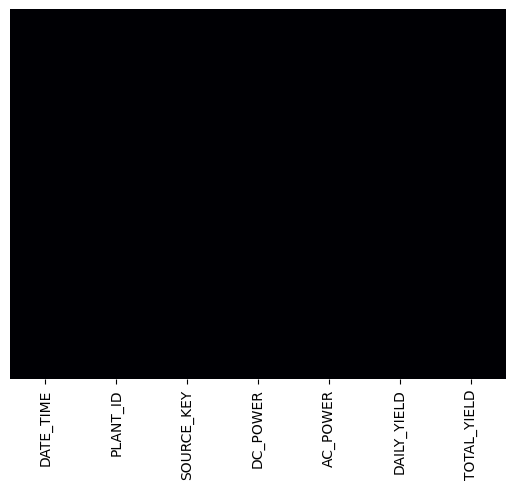

Plant 2 Generation Data


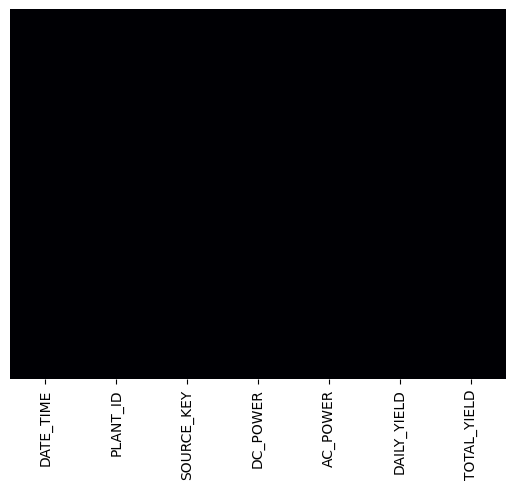

In [36]:
print('Plant 1 Generation Data')
sbn.heatmap(plant1_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Generation Data')
sbn.heatmap(plant2_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

In [37]:
print('There are {} inverters in Solar Power Plant 1.'.format(plant1_gen['SOURCE_KEY'].nunique()))
print('There are {} inverters in Solar Power Plant 2.'.format(plant2_gen['SOURCE_KEY'].nunique()))

There are 22 inverters in Solar Power Plant 1.
There are 22 inverters in Solar Power Plant 2.


Plant 1 Inverters


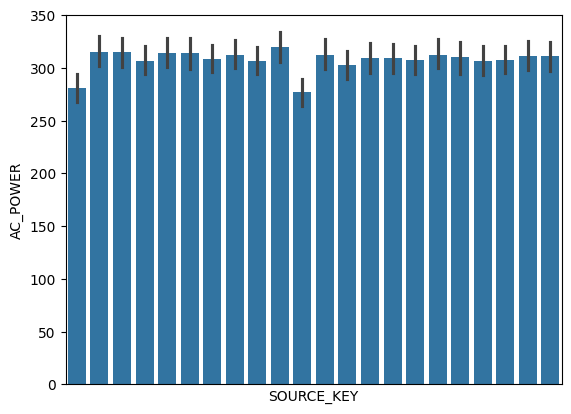

Plant 2 Inverters


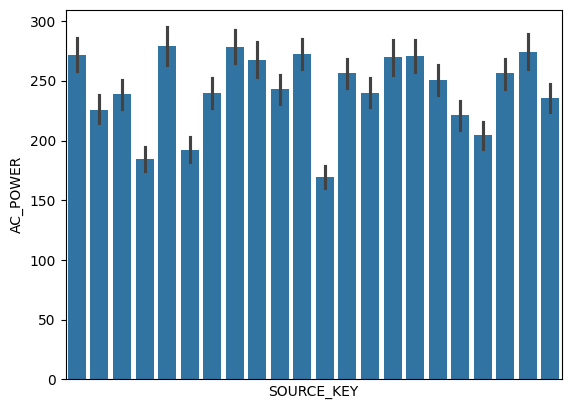

In [38]:
print('Plant 1 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_gen)
plt.xticks([])
plt.show()

print('Plant 2 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_gen)
plt.xticks([])
plt.show()

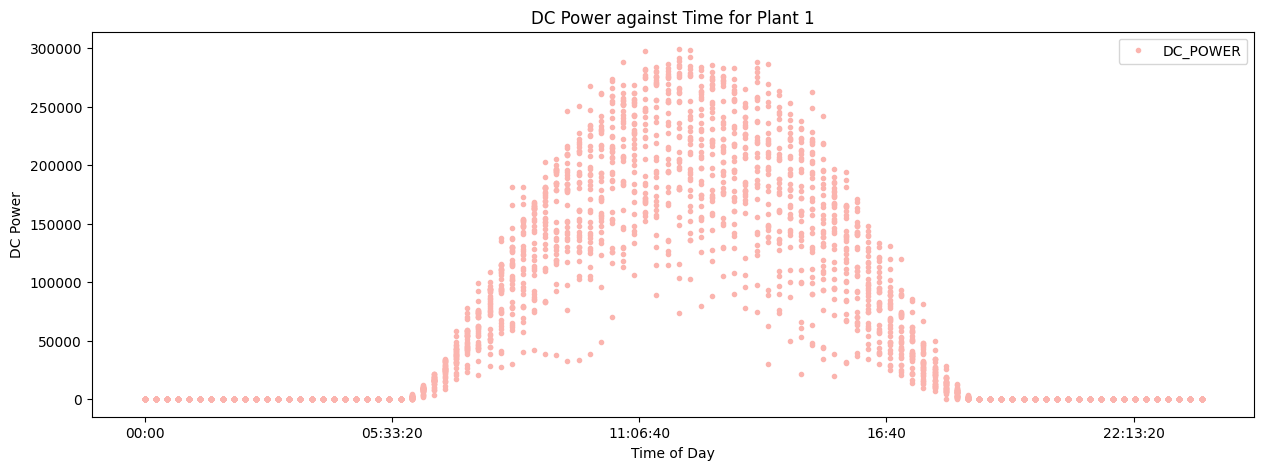

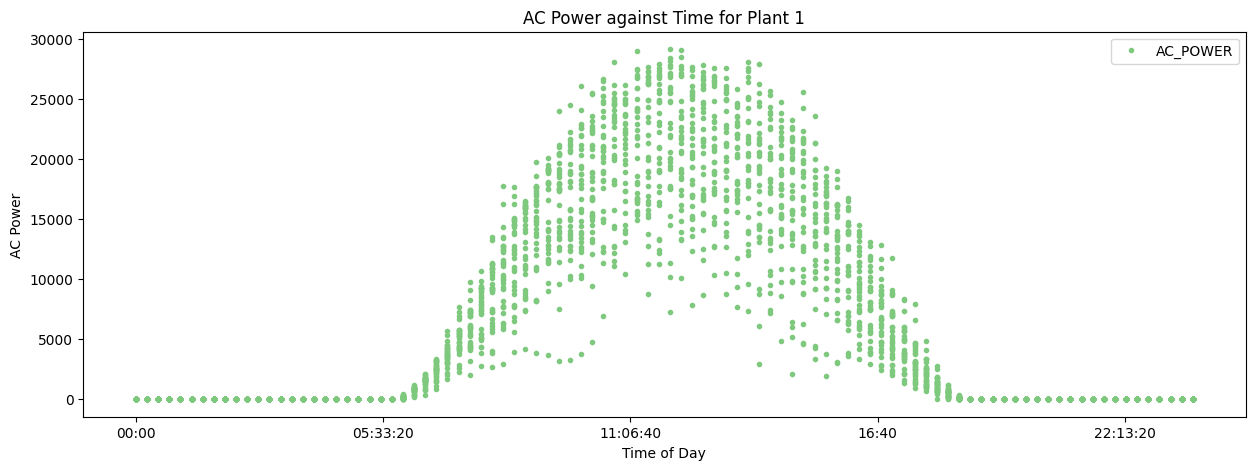

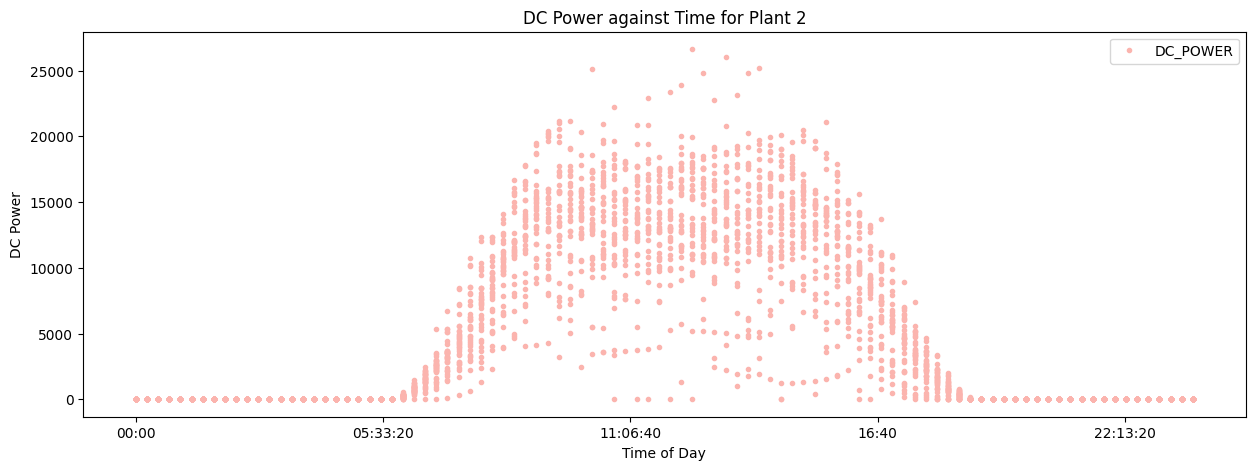

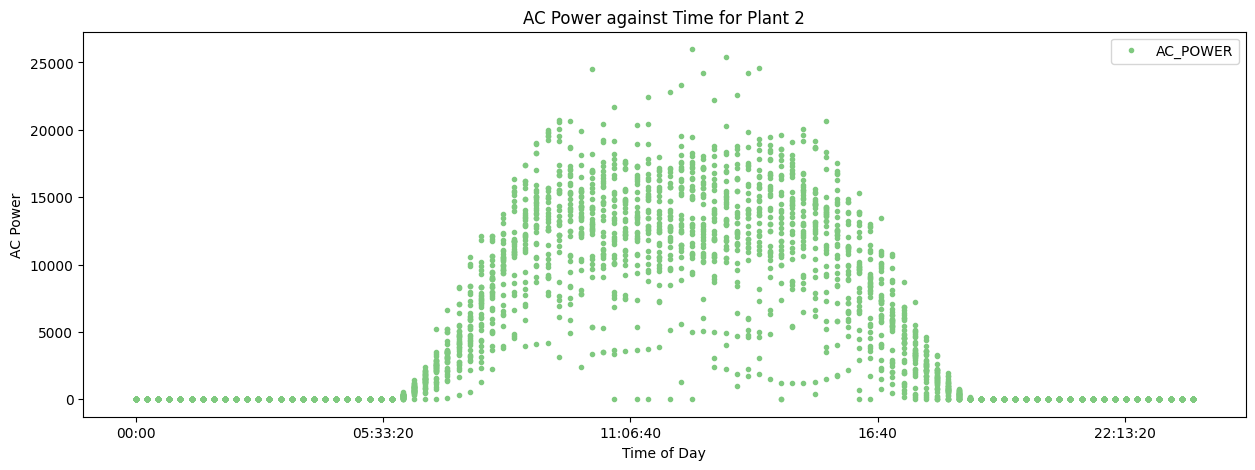

In [39]:
plant1_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent') 
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()

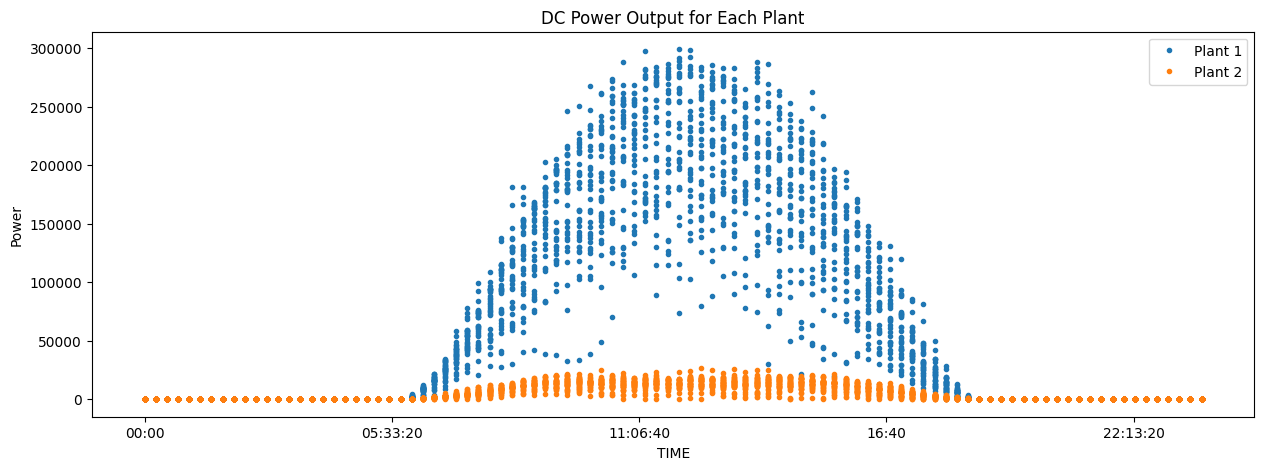

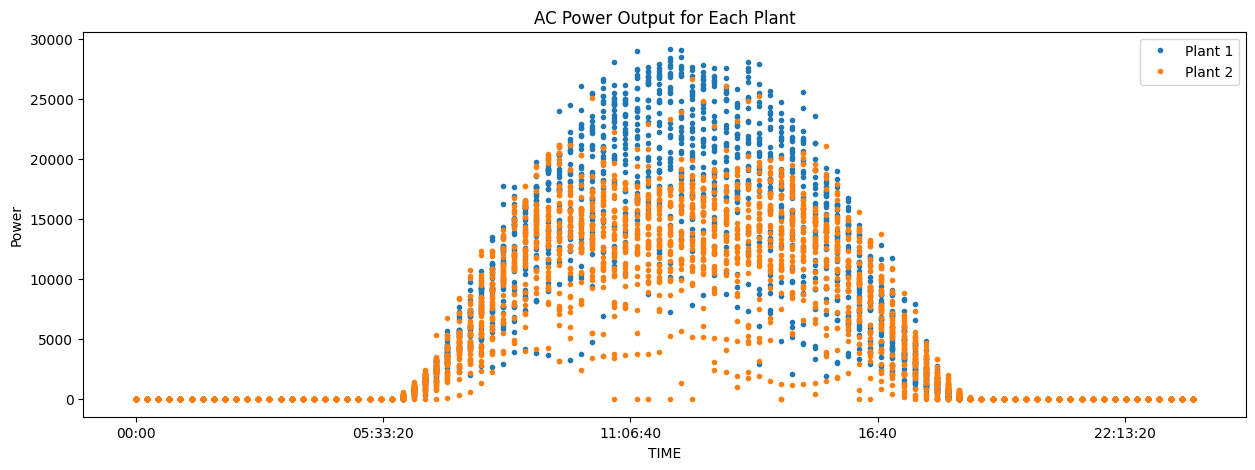

In [40]:
DCcompare = plant1_gendaily.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=DCcompare)
plt.title('DC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()


ACcompare = plant1_gendaily.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=ACcompare)
plt.title('AC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

In [42]:
# Drop non-numeric columns like 'PLANT_ID' and 'DATE_TIME' for correlation calculation
g1corr = plant1_gen.drop(['PLANT_ID', 'DATE_TIME'], axis=1).apply(pd.to_numeric, errors='coerce').corr()
g2corr = plant2_gen.drop(['PLANT_ID', 'DATE_TIME'], axis=1).apply(pd.to_numeric, errors='coerce').corr()

# Print the correlation matrices
print('Plant 1 Generation Data Correlation Coefficient')
print(g1corr)

print('Plant 2 Generation Data Correlation Coefficient')
print(g2corr)


Plant 1 Generation Data Correlation Coefficient
             SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
SOURCE_KEY          NaN       NaN       NaN          NaN          NaN
DC_POWER            NaN  1.000000  0.999996     0.082284     0.003815
AC_POWER            NaN  0.999996  1.000000     0.082234     0.003804
DAILY_YIELD         NaN  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD         NaN  0.003815  0.003804     0.009867     1.000000
Plant 2 Generation Data Correlation Coefficient
             SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
SOURCE_KEY          NaN       NaN       NaN          NaN          NaN
DC_POWER            NaN  1.000000  0.999997     0.005593     0.004528
AC_POWER            NaN  0.999997  1.000000     0.005395     0.004533
DAILY_YIELD         NaN  0.005593  0.005395     1.000000    -0.068472
TOTAL_YIELD         NaN  0.004528  0.004533    -0.068472     1.000000


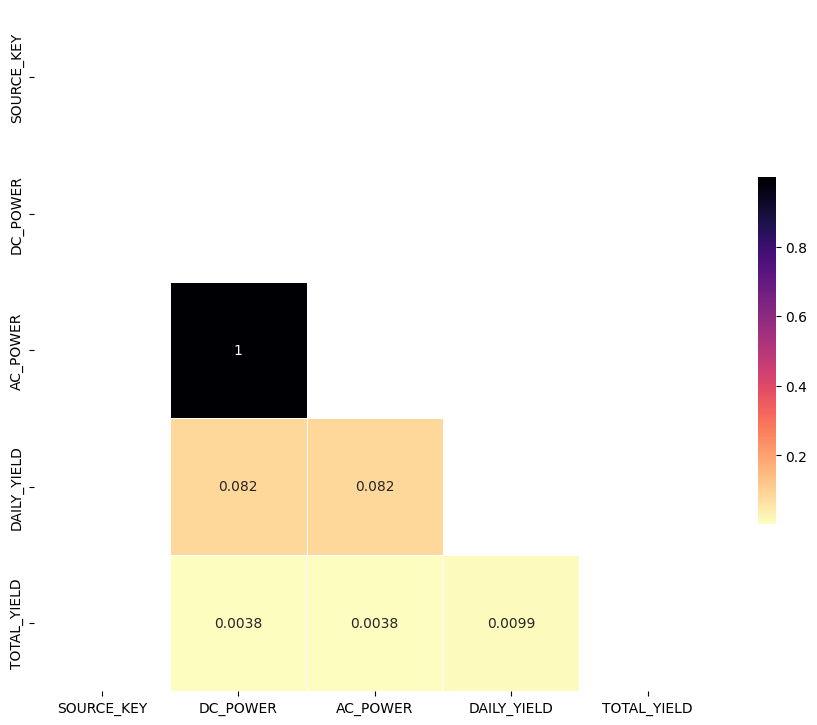

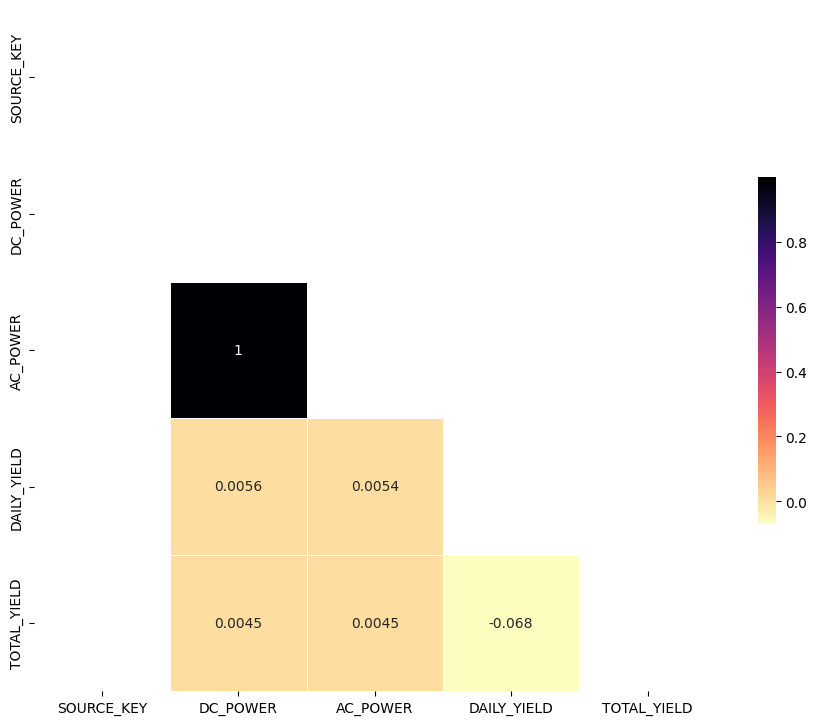

In [43]:
g1mask = np.triu(np.ones_like(g1corr, dtype=bool))
g2mask = np.triu(np.ones_like(g2corr, dtype=bool))

cmap = 'magma_r'

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g1corr, mask=g1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g2corr, mask=g2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [44]:
plant1_sens

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

In [47]:
plant1_sens

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

In [45]:
plant1_sensdaily = plant1_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant1_sensdaily

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            25.184316           22.857507   
1     2020-05-15 00:15:00            25.084589           22.761668   
2     2020-05-15 00:30:00            24.935753           22.592306   
3     2020-05-15 00:45:00            24.846130           22.360852   
4     2020-05-15 01:00:00            24.621525           22.165423   
...                   ...                  ...                 ...   
3177  2020-06-17 22:45:00            22.150570           21.480377   
3178  2020-06-17 23:00:00            22.129816           21.389024   
3179  2020-06-17 23:15:00            22.008275           20.709211   
3180  2020-06-17 23:30:00            21.969495           20.734963   
3181  2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION       SOURCE_KEY  
0             0.0  HmiyD2TTLFNqkNe  
1             0.0  HmiyD2TTLFNqkNe  
2             0.0  HmiyD2TTLFNqkNe  
3             0.0  HmiyD2TTLFNqkNe  
4             0.0  HmiyD2TTLFNqkNe  
...           ...              ...  
3177          0.0  HmiyD2TTLFNqkNe  
3178          0.0  HmiyD2TTLFNqkNe  
3179          0.0  HmiyD2TTLFNqkNe  
3180          0.0  HmiyD2TTLFNqkNe  
3181          0.0  HmiyD2TTLFNqkNe  

[3182 rows x 5 columns]

In [46]:
plant2_sensdaily = plant2_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant2_sensdaily

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            27.004764           25.060789   
1     2020-05-15 00:15:00            26.880811           24.421869   
2     2020-05-15 00:30:00            26.682055           24.427290   
3     2020-05-15 00:45:00            26.500589           24.420678   
4     2020-05-15 01:00:00            26.596148           25.088210   
...                   ...                  ...                 ...   
3254  2020-06-17 22:45:00            23.511703           22.856201   
3255  2020-06-17 23:00:00            23.482282           22.744190   
3256  2020-06-17 23:15:00            23.354743           22.492245   
3257  2020-06-17 23:30:00            23.291048           22.373909   
3258  2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION       SOURCE_KEY  
0             0.0  iq8k7ZNt4Mwm3w0  
1             0.0  iq8k7ZNt4Mwm3w0  
2             0.0  iq8k7ZNt4Mwm3w0  
3             0.0  iq8k7ZNt4Mwm3w0  
4             0.0  iq8k7ZNt4Mwm3w0  
...           ...              ...  
3254          0.0  iq8k7ZNt4Mwm3w0  
3255          0.0  iq8k7ZNt4Mwm3w0  
3256          0.0  iq8k7ZNt4Mwm3w0  
3257          0.0  iq8k7ZNt4Mwm3w0  
3258          0.0  iq8k7ZNt4Mwm3w0  

[3259 rows x 5 columns]

In [48]:
#Plant 1 sensor data
plant1_sensdaily['DATE_TIME'] = pd.to_datetime(plant1_sensdaily['DATE_TIME']) 
plant1_sensdaily['TIME'] = plant1_sensdaily['DATE_TIME'].dt.time 
plant1_sensdaily['DATE'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensdaily['DATE_TIME'] = pd.to_datetime(plant2_sensdaily['DATE_TIME']) 
plant2_sensdaily['TIME'] = plant2_sensdaily['DATE_TIME'].dt.time 
plant2_sensdaily['DATE'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'].dt.date)

In [49]:
plant1_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
 4   SOURCE_KEY           3182 non-null   object        
 5   TIME                 3182 non-null   object        
 6   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 174.1+ KB


In [50]:
plant2_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3259 non-null   float64       
 2   MODULE_TEMPERATURE   3259 non-null   float64       
 3   IRRADIATION          3259 non-null   float64       
 4   SOURCE_KEY           3259 non-null   object        
 5   TIME                 3259 non-null   object        
 6   DATE                 3259 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 178.4+ KB


Plant 1 Sensor Data


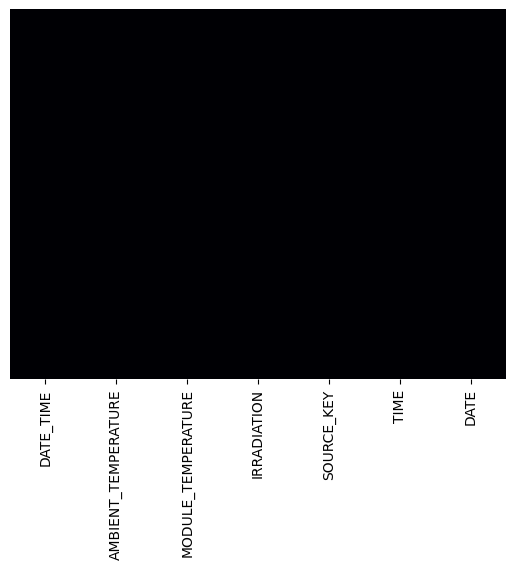

Plant 2 Sensor Data


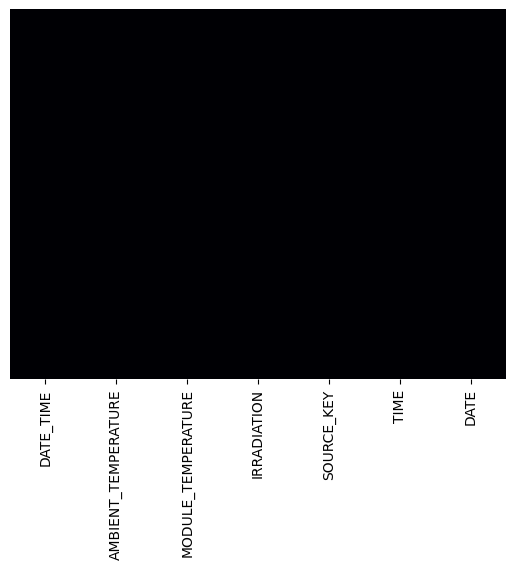

In [51]:
print('Plant 1 Sensor Data')
sbn.heatmap(plant1_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Sensor Data')
sbn.heatmap(plant2_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

In [52]:
plant1_sensdaily['DATE'].nunique()

34

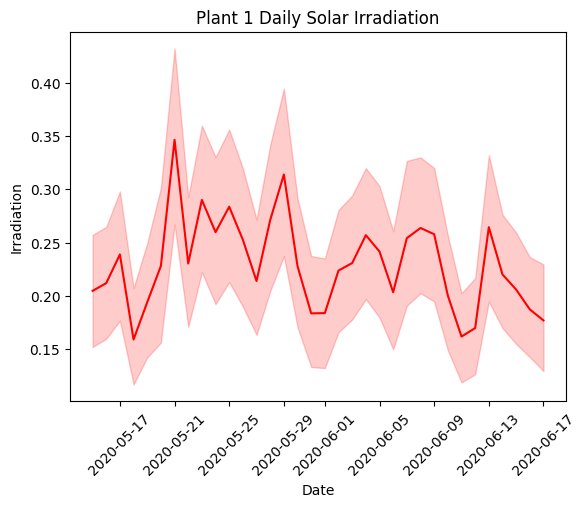

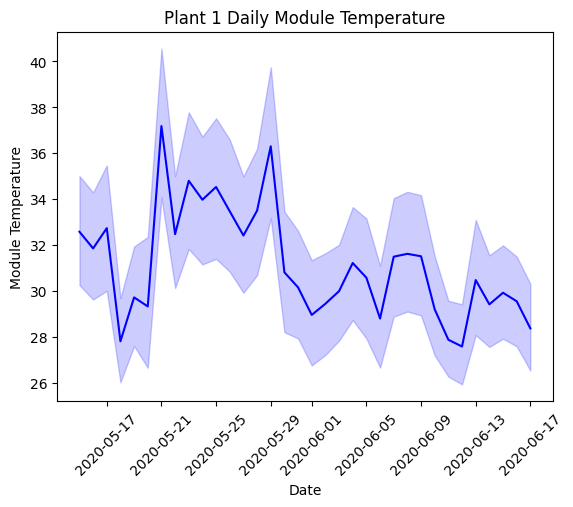

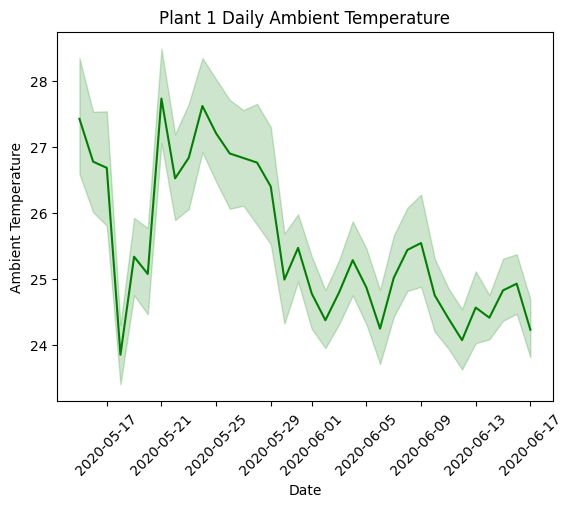

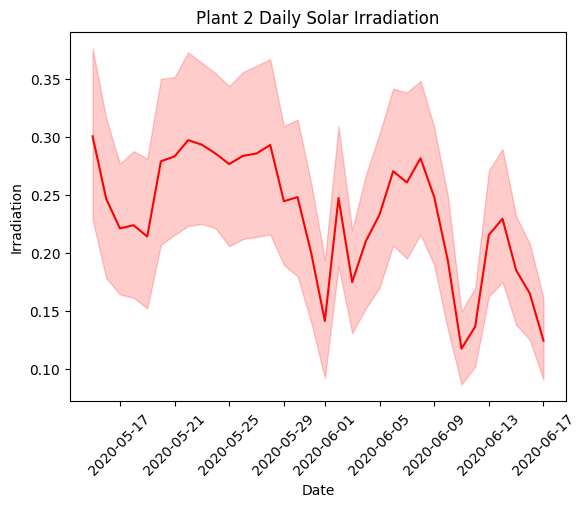

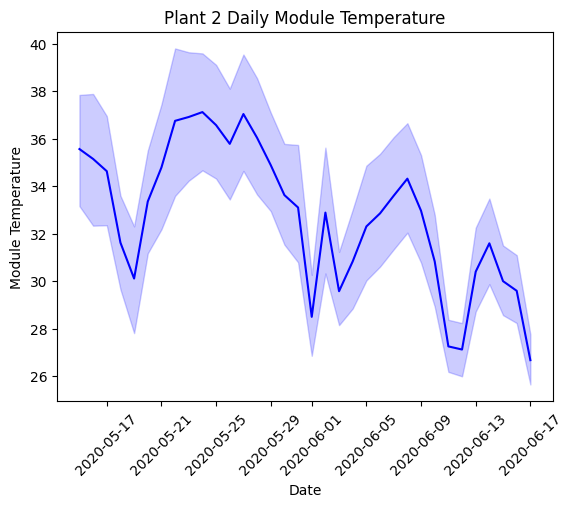

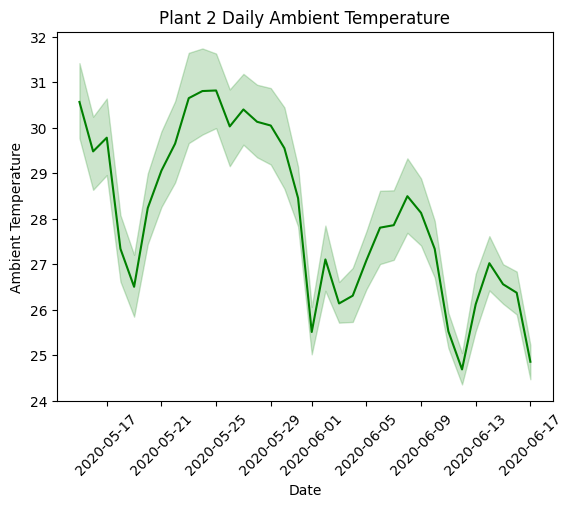

In [53]:
#Plant 1
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

#Plant 2
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 2 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

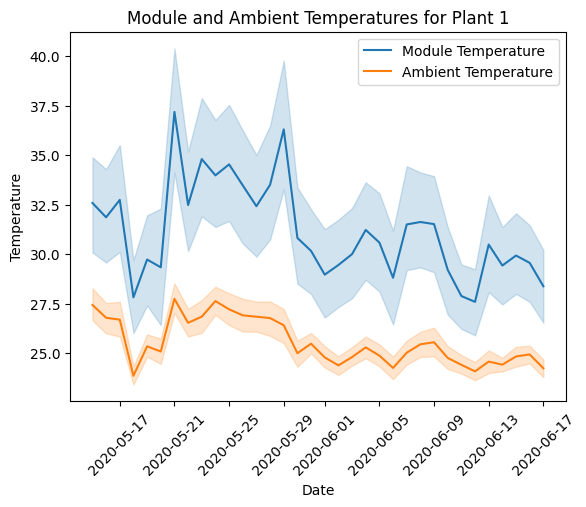

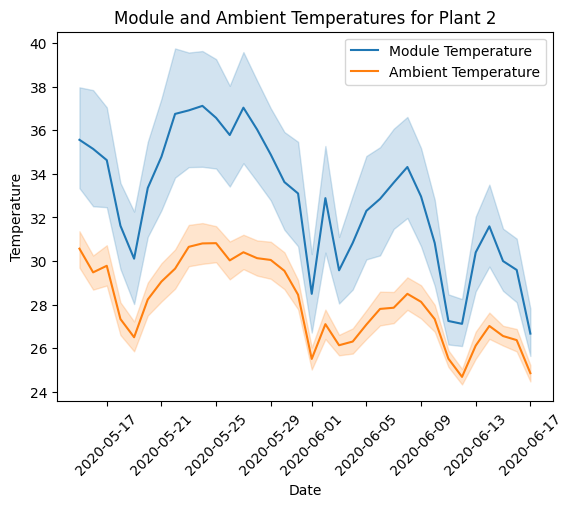

In [55]:
tempsens_plant1 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant1)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xticks(rotation=45)
plt.show()

tempsens_plant2 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xticks(rotation=45)
plt.show()

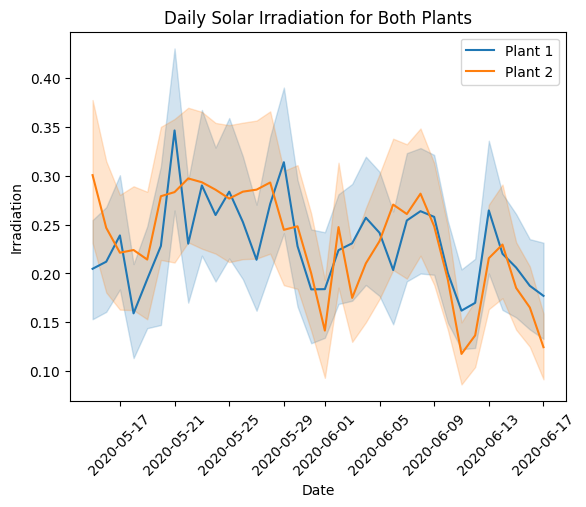

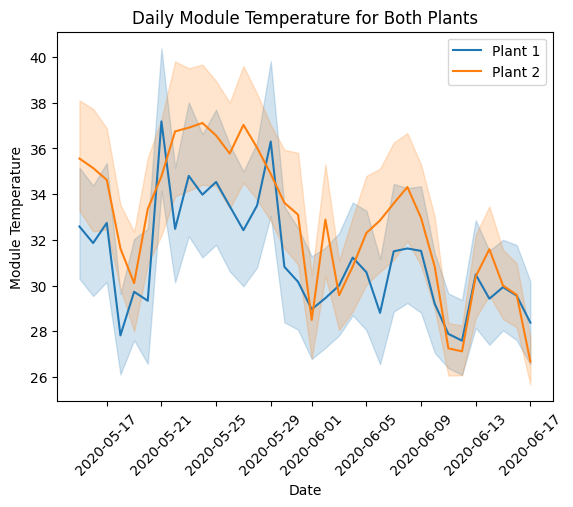

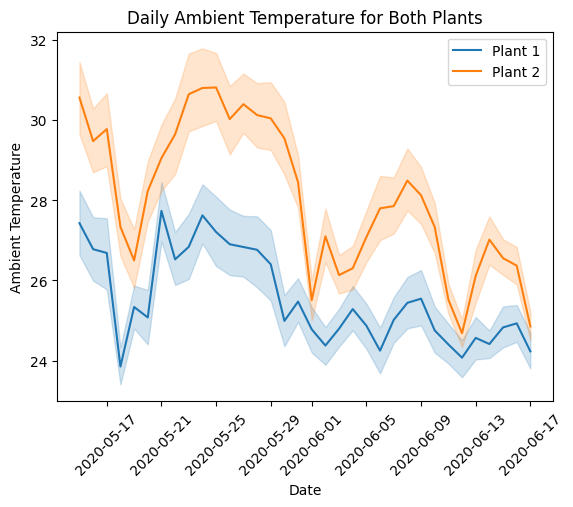

In [56]:
# Daily Irradiation
ambient_compare = sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Module Temperature
modtemp_compare = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Ambient Temperature
ambtemp_compare = sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

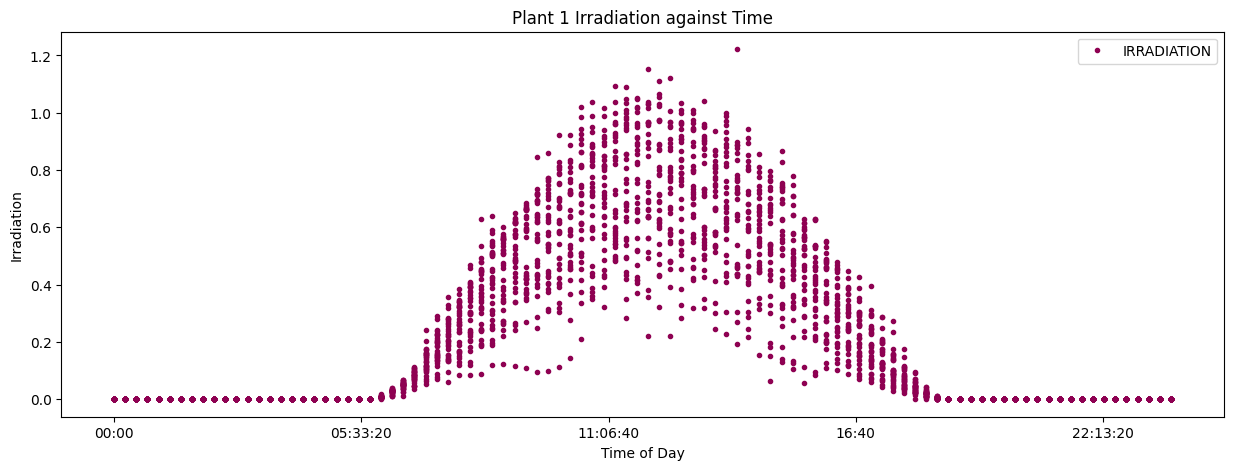

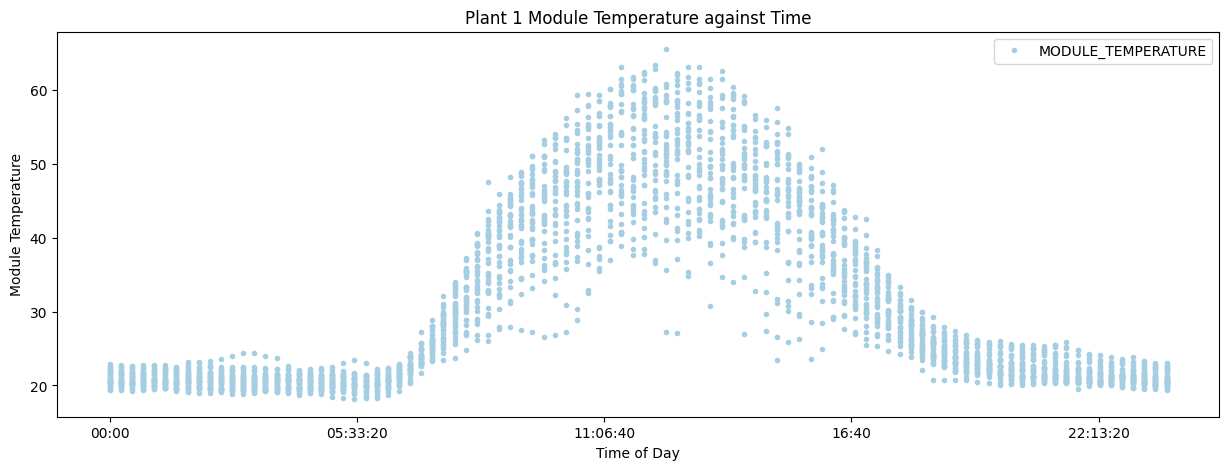

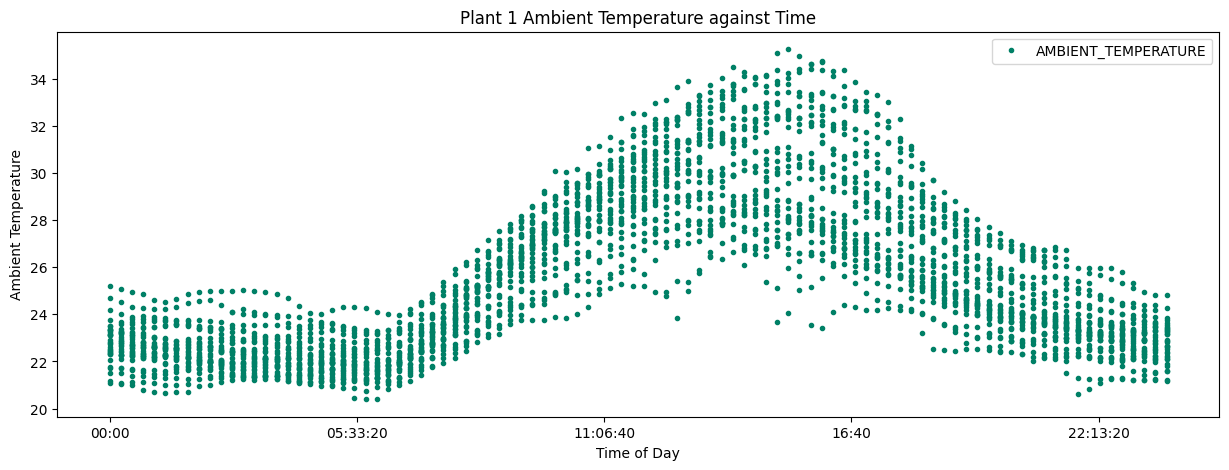

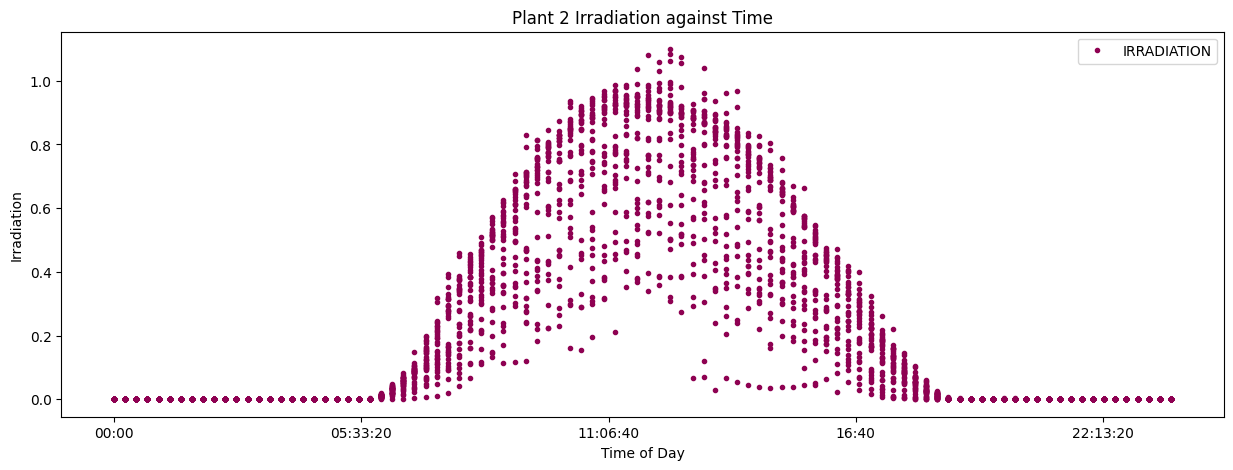

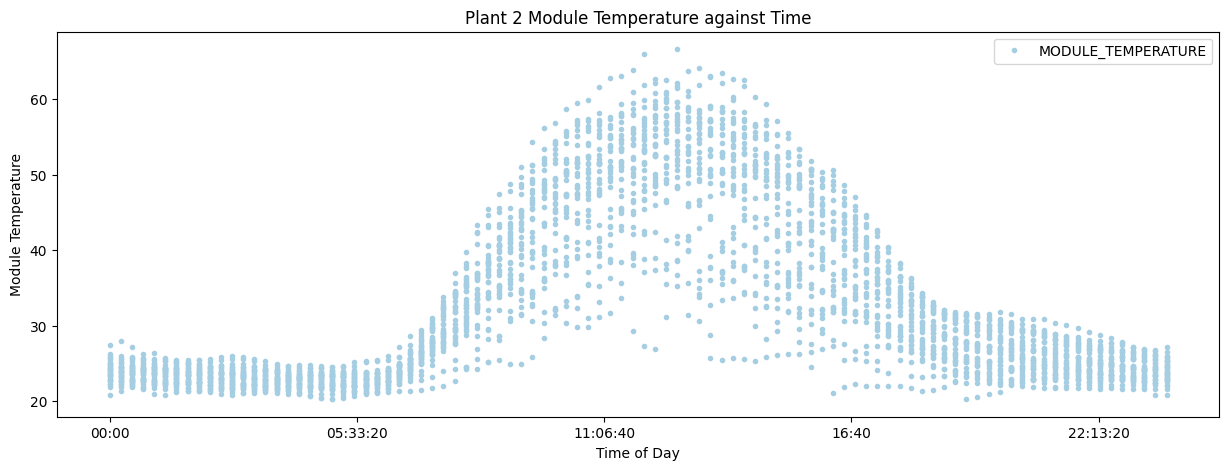

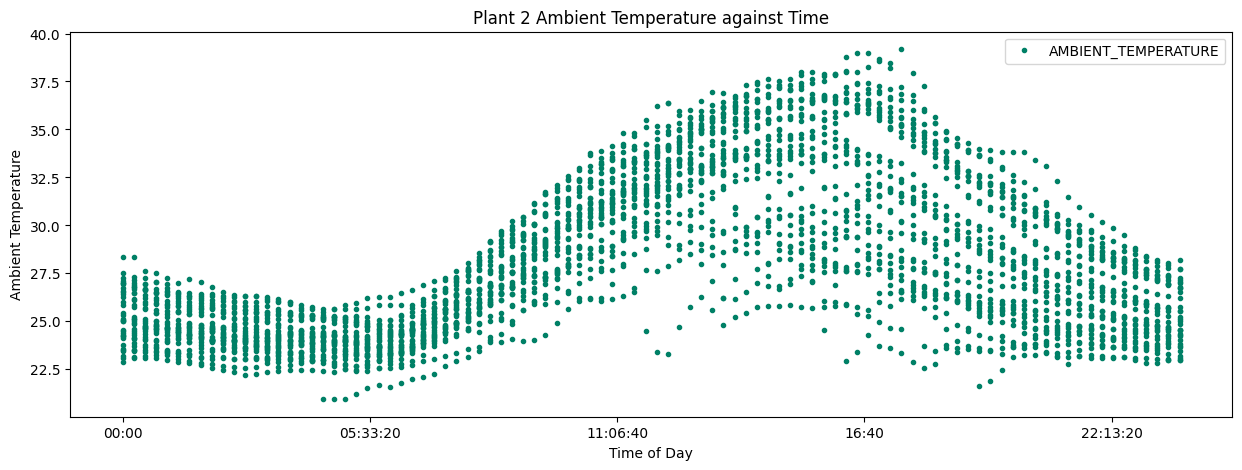

In [57]:
# Plant 1
# Irradiation
plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG') 
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

# Module Temperature
plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired') 
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer') 
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Ambient Temperature against Time')
plt.show()

# Plant 2
# Irradiation
plant2_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG') 
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

# Module Temperature
plant2_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired') 
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant2_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer') 
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Ambient Temperature against Time')
plt.show()

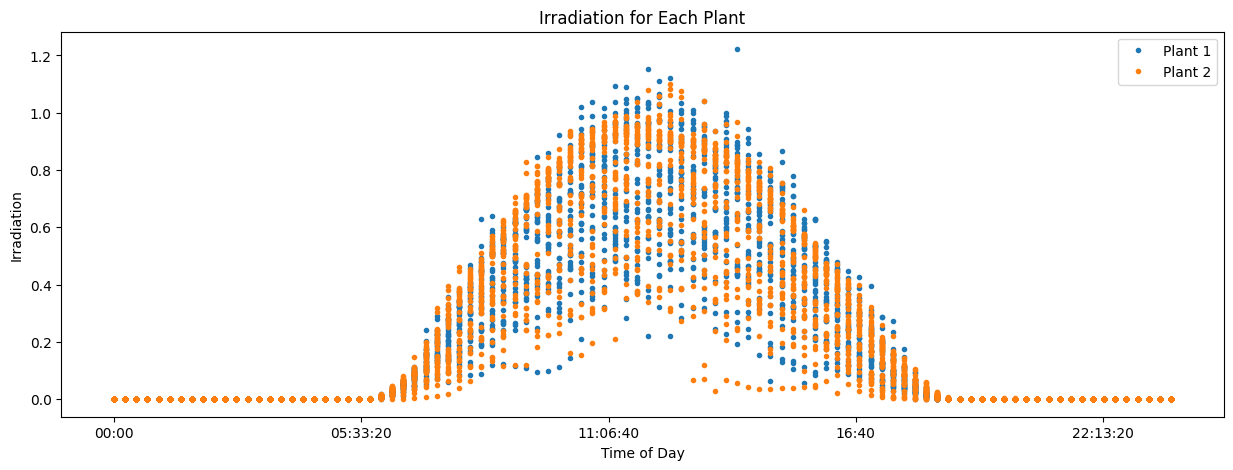

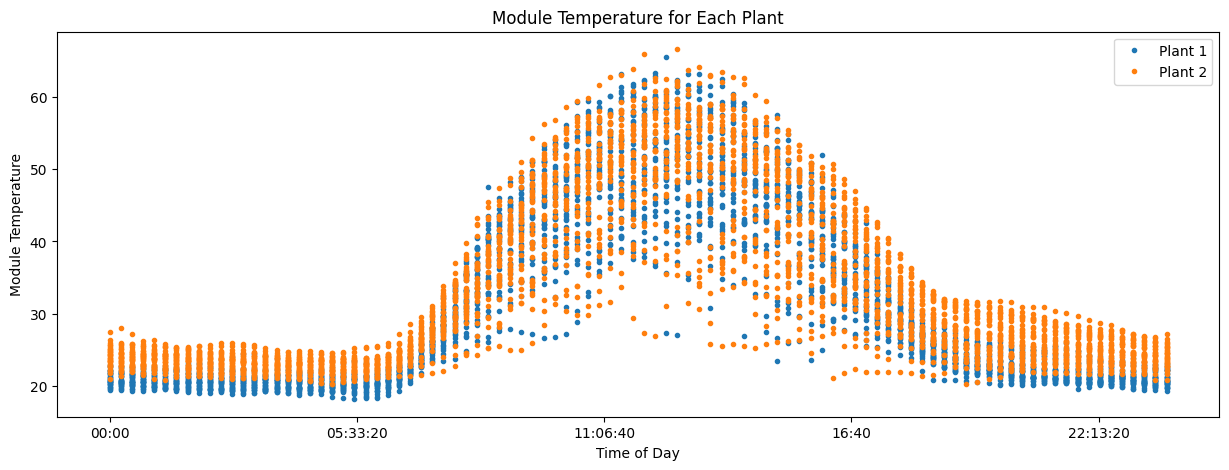

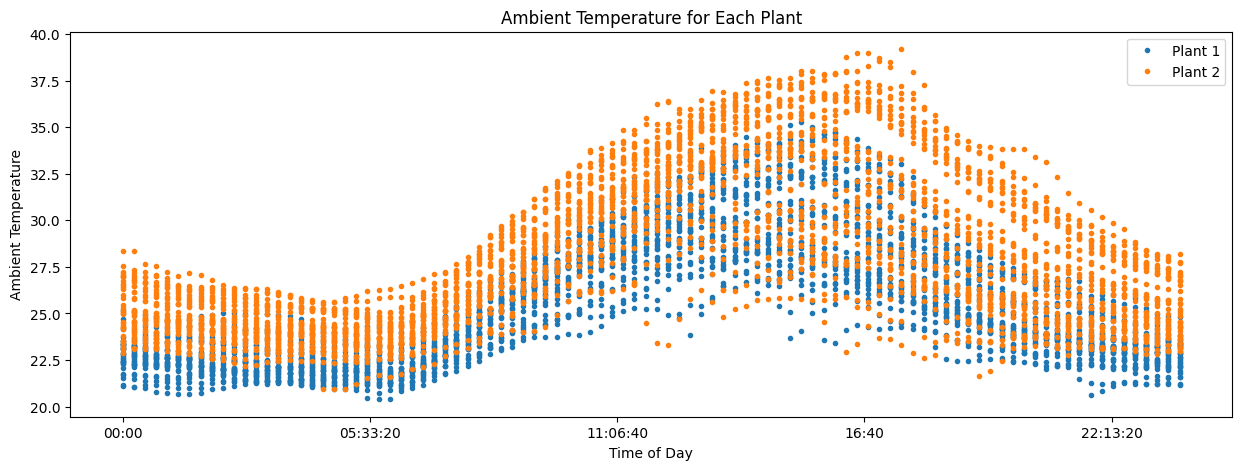

In [58]:
# Hourly sens for each plant

# Irradiation
irr_hour = plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=irr_hour)
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation for Each Plant')
plt.show()

# Module temperature
modtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=modtemp_hour)
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Module Temperature for Each Plant')
plt.show()

# Ambient temperature
ambtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ambtemp_hour)
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature for Each Plant')
plt.show()

In [59]:
mergedata1 = plant1_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata1.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            25.184316           22.857507          0.0   
1 2020-05-15 00:15:00            25.084589           22.761668          0.0   
2 2020-05-15 00:30:00            24.935753           22.592306          0.0   
3 2020-05-15 00:45:00            24.846130           22.360852          0.0   
4 2020-05-15 01:00:00            24.621525           22.165423          0.0   

        SOURCE_KEY    TIME_x     DATE_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0  HmiyD2TTLFNqkNe  00:00:00 2020-05-15       0.0       0.0          0.0   
1  HmiyD2TTLFNqkNe  00:15:00 2020-05-15       0.0       0.0          0.0   
2  HmiyD2TTLFNqkNe  00:30:00 2020-05-15       0.0       0.0          0.0   
3  HmiyD2TTLFNqkNe  00:45:00 2020-05-15       0.0       0.0          0.0   
4  HmiyD2TTLFNqkNe  01:00:00 2020-05-15       0.0       0.0          0.0   

   TOTAL_YIELD    TIME_y      DATE_y  
0  143581676.0  00:00:00  2020-05-15  
1  143581676.0  00:15:00  2020-05-15  
2  143581676.0  00:30:00  2020-05-15  
3  143581676.0  00:45:00  2020-05-15  
4  150761642.0  01:00:00  2020-05-15

In [60]:
mergedata2 = plant2_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata2.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            27.004764           25.060789          0.0   
1 2020-05-15 00:15:00            26.880811           24.421869          0.0   
2 2020-05-15 00:30:00            26.682055           24.427290          0.0   
3 2020-05-15 00:45:00            26.500589           24.420678          0.0   
4 2020-05-15 01:00:00            26.596148           25.088210          0.0   

        SOURCE_KEY    TIME_x     DATE_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0  iq8k7ZNt4Mwm3w0  00:00:00 2020-05-15       0.0       0.0          0.0   
1  iq8k7ZNt4Mwm3w0  00:15:00 2020-05-15       0.0       0.0          0.0   
2  iq8k7ZNt4Mwm3w0  00:30:00 2020-05-15       0.0       0.0          0.0   
3  iq8k7ZNt4Mwm3w0  00:45:00 2020-05-15       0.0       0.0          0.0   
4  iq8k7ZNt4Mwm3w0  01:00:00 2020-05-15       0.0       0.0          0.0   

   TOTAL_YIELD    TIME_y      DATE_y  
0  143581676.0  00:00:00  2020-05-15  
1  143581676.0  00:15:00  2020-05-15  
2  143581676.0  00:30:00  2020-05-15  
3  143581676.0  00:45:00  2020-05-15  
4  150761642.0  01:00:00  2020-05-15

In [64]:
mergedata1

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3152 2020-06-17 22:45:00            22.150570           21.480377   
3153 2020-06-17 23:00:00            22.129816           21.389024   
3154 2020-06-17 23:15:00            22.008275           20.709211   
3155 2020-06-17 23:30:00            21.969495           20.734963   
3156 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION       SOURCE_KEY  DC_POWER  AC_POWER    DAILY_YIELD  \
0             0.0  HmiyD2TTLFNqkNe       0.0       0.0       0.000000   
1             0.0  HmiyD2TTLFNqkNe       0.0       0.0       0.000000   
2             0.0  HmiyD2TTLFNqkNe       0.0       0.0       0.000000   
3             0.0  HmiyD2TTLFNqkNe       0.0       0.0       0.000000   
4             0.0  HmiyD2TTLFNqkNe       0.0       0.0       0.000000   
...           ...              ...       ...       ...            ...   
3152          0.0  HmiyD2TTLFNqkNe       0.0       0.0  129571.000000   
3153          0.0  HmiyD2TTLFNqkNe       0.0       0.0  129571.000000   
3154          0.0  HmiyD2TTLFNqkNe       0.0       0.0  129571.000000   
3155          0.0  HmiyD2TTLFNqkNe       0.0       0.0  129571.000000   
3156          0.0  HmiyD2TTLFNqkNe       0.0       0.0  127962.767857   

      TOTAL_YIELD  
0     143581676.0  
1     143581676.0  
2     143581676.0  
3     143581676.0  
4     150761642.0  
...           ...  
3152  156142755.0  
3153  156142755.0  
3154  156142755.0  
3155  156142755.0  
3156  156142755.0  

[3157 rows x 9 columns]

In [65]:
mergedata2

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            27.004764           25.060789   
1    2020-05-15 00:15:00            26.880811           24.421869   
2    2020-05-15 00:30:00            26.682055           24.427290   
3    2020-05-15 00:45:00            26.500589           24.420678   
4    2020-05-15 01:00:00            26.596148           25.088210   
...                  ...                  ...                 ...   
3149 2020-06-17 22:45:00            23.511703           22.856201   
3150 2020-06-17 23:00:00            23.482282           22.744190   
3151 2020-06-17 23:15:00            23.354743           22.492245   
3152 2020-06-17 23:30:00            23.291048           22.373909   
3153 2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION       SOURCE_KEY  DC_POWER  AC_POWER    DAILY_YIELD  \
0             0.0  iq8k7ZNt4Mwm3w0       0.0       0.0       0.000000   
1             0.0  iq8k7ZNt4Mwm3w0       0.0       0.0       0.000000   
2             0.0  iq8k7ZNt4Mwm3w0       0.0       0.0       0.000000   
3             0.0  iq8k7ZNt4Mwm3w0       0.0       0.0       0.000000   
4             0.0  iq8k7ZNt4Mwm3w0       0.0       0.0       0.000000   
...           ...              ...       ...       ...            ...   
3149          0.0  iq8k7ZNt4Mwm3w0       0.0       0.0  129571.000000   
3150          0.0  iq8k7ZNt4Mwm3w0       0.0       0.0  129571.000000   
3151          0.0  iq8k7ZNt4Mwm3w0       0.0       0.0  129571.000000   
3152          0.0  iq8k7ZNt4Mwm3w0       0.0       0.0  129571.000000   
3153          0.0  iq8k7ZNt4Mwm3w0       0.0       0.0  127962.767857   

      TOTAL_YIELD  
0     143581676.0  
1     143581676.0  
2     143581676.0  
3     143581676.0  
4     150761642.0  
...           ...  
3149  156142755.0  
3150  156142755.0  
3151  156142755.0  
3152  156142755.0  
3153  156142755.0  

[3154 rows x 9 columns]

In [67]:
# Drop non-numeric columns from the dataset before calculating correlation
numeric_data1 = mergedata1.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
numeric_data2 = mergedata2.apply(pd.to_numeric, errors='coerce')

mergecorr1 = numeric_data1.corr()
mergecorr2 = numeric_data2.corr()

print('Plant 1 Merged Generation and Sensor Data Correlation Coefficient')
print(mergecorr1)

print('Plant 2 Merged Generation and Sensor Data Correlation Coefficient')
print(mergecorr2)

Plant 1 Merged Generation and Sensor Data Correlation Coefficient
                     DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
DATE_TIME             1.000000            -0.215680           -0.093266   
AMBIENT_TEMPERATURE  -0.215680             1.000000            0.853162   
MODULE_TEMPERATURE   -0.093266             0.853162            1.000000   
IRRADIATION          -0.032842             0.721839            0.961422   
SOURCE_KEY                 NaN                  NaN                 NaN   
DC_POWER             -0.025361             0.725679            0.960939   
AC_POWER             -0.025288             0.725879            0.961011   
DAILY_YIELD           0.028455             0.498010            0.212765   
TOTAL_YIELD           0.235218            -0.039269            0.069338   

                     IRRADIATION  SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
DATE_TIME              -0.032842         NaN -0.025361 -0.025288     0.028455   
AMBIENT_TEMPERATURE  

Plant 1


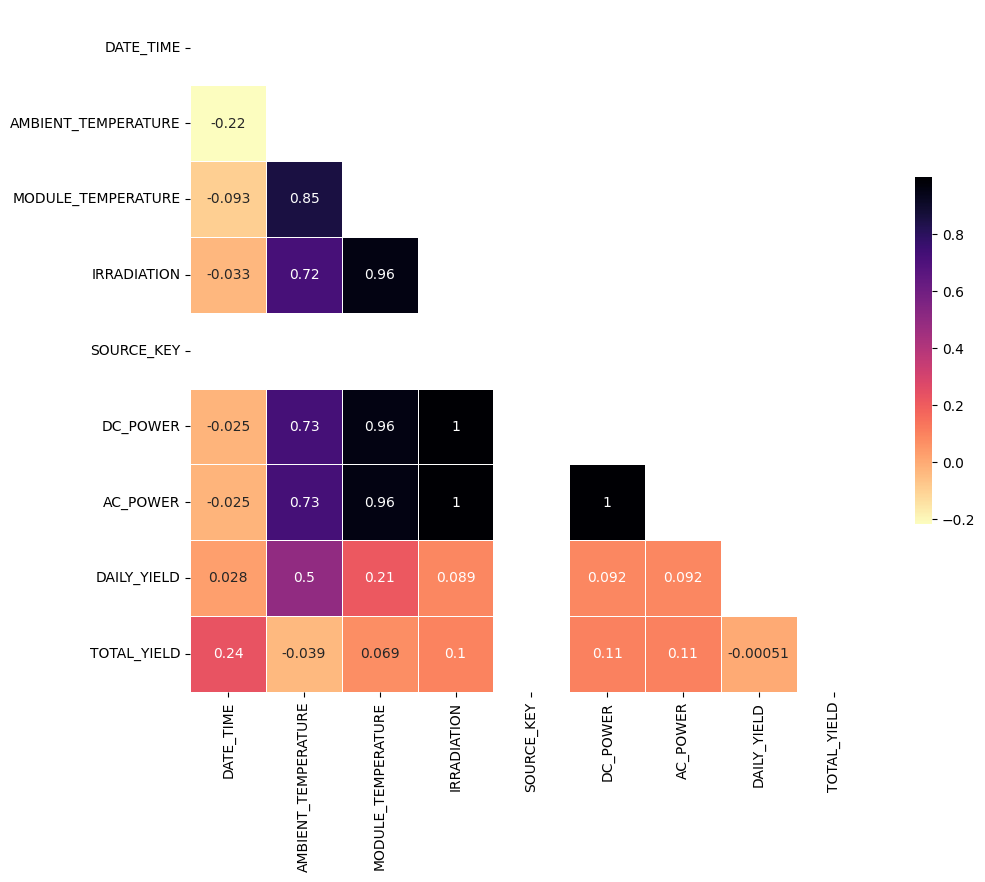

Plant 2


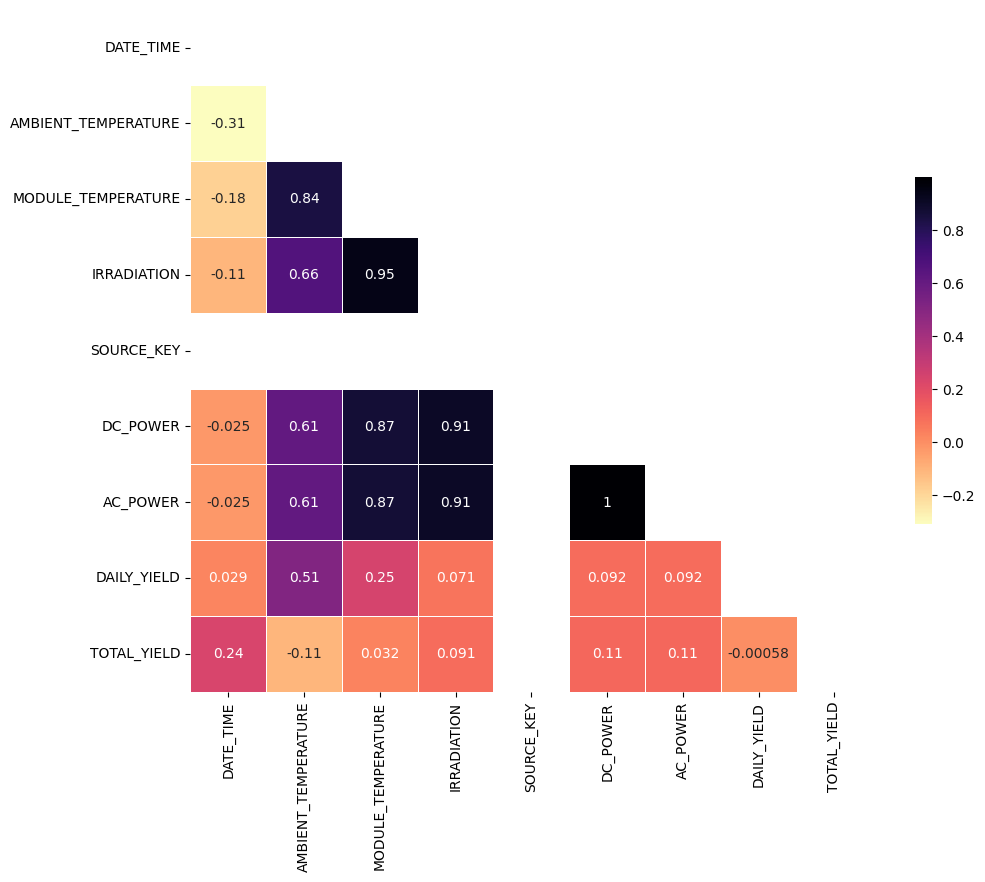

In [68]:
s1mask = np.triu(np.ones_like(mergecorr1, dtype=bool))
s2mask = np.triu(np.ones_like(mergecorr2, dtype=bool))

cmap = 'magma_r'

print('Plant 1')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr1, mask=s1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

print('Plant 2')
f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(mergecorr2, mask=s2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [69]:
# Plant 1
c1 = mergecorr1.unstack()
sort1 = c1.sort_values(kind="quicksort")
print('Plant 1 Top Correlations:')
print(sort1[22:42])
print('')

# Plant 2
c2 = mergecorr2.unstack()
sort2 = c2.sort_values(kind="quicksort")
print('Plant 2 Top Correlations:')
print(sort2[22:42])

Plant 1 Top Correlations:
DC_POWER             DAILY_YIELD            0.092450
DAILY_YIELD          DC_POWER               0.092450
IRRADIATION          TOTAL_YIELD            0.102223
TOTAL_YIELD          IRRADIATION            0.102223
DC_POWER             TOTAL_YIELD            0.106301
TOTAL_YIELD          DC_POWER               0.106301
AC_POWER             TOTAL_YIELD            0.106401
TOTAL_YIELD          AC_POWER               0.106401
DAILY_YIELD          MODULE_TEMPERATURE     0.212765
MODULE_TEMPERATURE   DAILY_YIELD            0.212765
TOTAL_YIELD          DATE_TIME              0.235218
DATE_TIME            TOTAL_YIELD            0.235218
AMBIENT_TEMPERATURE  DAILY_YIELD            0.498010
DAILY_YIELD          AMBIENT_TEMPERATURE    0.498010
AMBIENT_TEMPERATURE  IRRADIATION            0.721839
IRRADIATION          AMBIENT_TEMPERATURE    0.721839
DC_POWER             AMBIENT_TEMPERATURE    0.725679
AMBIENT_TEMPERATURE  DC_POWER               0.725679
                    

Plant 1


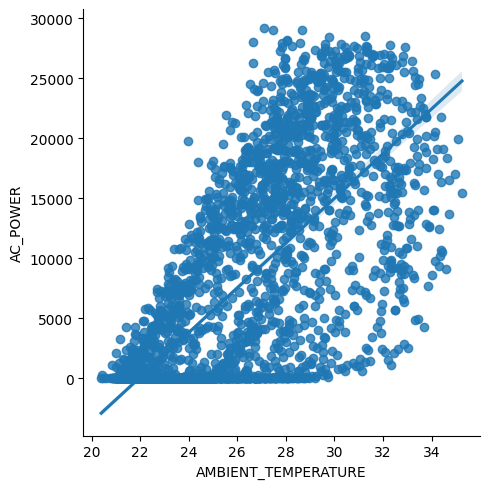

In [70]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata1)
print('Plant 1')
plt.show()

Plant 2


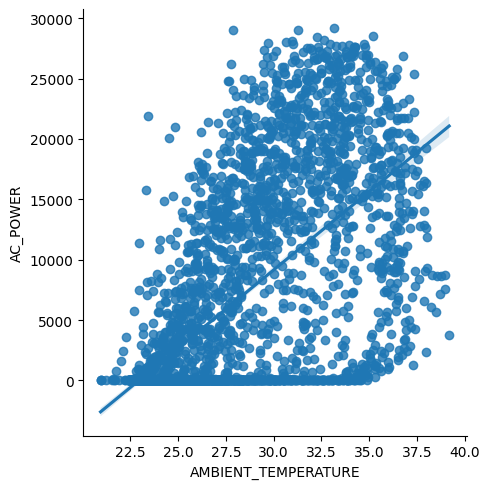

In [71]:
sbn.lmplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=mergedata2)
print('Plant 2')
plt.show()

In [75]:
mergedata1.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [79]:
mergedata2.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

MODEL

In [80]:
X = mergedata1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] 
y = mergedata1['AC_POWER']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train, y_train)

LinearRegression()

In [86]:
print('PLANT 1')
print('The intercept for the linear regression is at', lm.intercept_)
print('The linear regression coefficients are:')

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(coef_df)

PLANT 1
The intercept for the linear regression is at -440.7989426058075
The linear regression coefficients are:
                            Coeff
AMBIENT_TEMPERATURE     -2.859859
MODULE_TEMPERATURE      30.129244
IRRADIATION          27327.862959


In [87]:
X2 = mergedata2[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y2 = mergedata2['AC_POWER']

In [88]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [89]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

LinearRegression()

In [90]:
print('PLANT 2')
print('The intercept for the linear regression is at', lm2.intercept_)
print('The linear regression coefficients are:')

coef2_df = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coeff2'])
print(coef2_df)

PLANT 2
The intercept for the linear regression is at 966.4619037322764
The linear regression coefficients are:
                           Coeff2
AMBIENT_TEMPERATURE   -259.465650
MODULE_TEMPERATURE     267.516200
IRRADIATION          18041.434265


In [94]:
predictions1 = lm.predict(X_test)
predictions2 = lm2.predict(X2_test)

Text(0, 0.5, 'Actual Output')

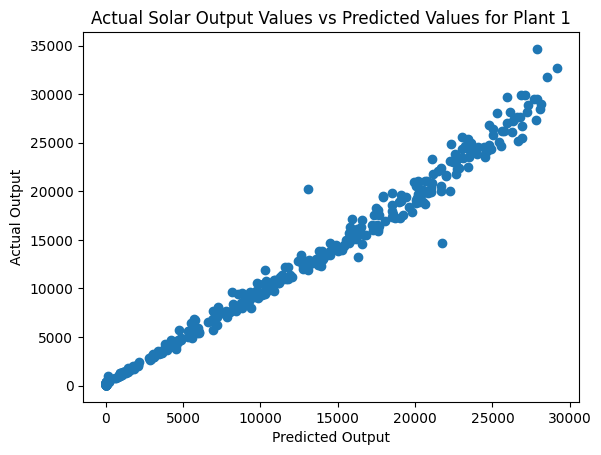

In [93]:
plt.scatter(y_test, predictions1)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 1')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

Text(0, 0.5, 'Actual Output')

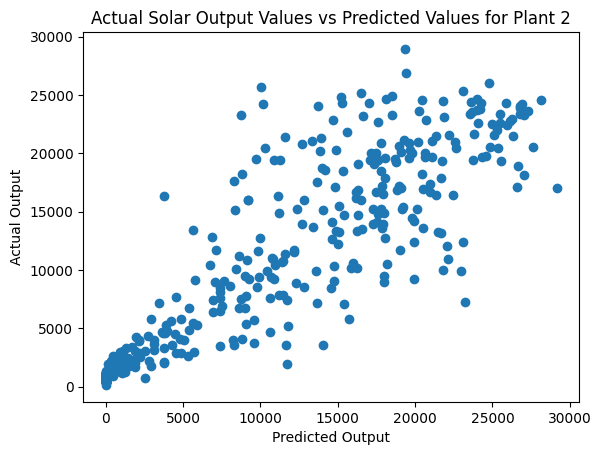

In [95]:
plt.scatter(y2_test, predictions2)
plt.title('Actual Solar Output Values vs Predicted Values for Plant 2')
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

In [96]:
from sklearn import metrics

MAE1 = metrics.mean_absolute_error(y_test,predictions1)
MSE1 = metrics.mean_squared_error(y_test,predictions1)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,predictions1))
print('Metrics for Plant 1 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)
print()

MAE1 = metrics.mean_absolute_error(y2_test,predictions2)
MSE1 = metrics.mean_squared_error(y2_test,predictions2)
RMSE1 = np.sqrt(metrics.mean_squared_error(y2_test,predictions2))
print('Metrics for Plant 2 Linear Model')
print('MAE: ', MAE1)
print('MSE: ',MSE1)
print('RMSE: ', RMSE1)

Metrics for Plant 1 Linear Model
MAE:  445.19195746063843
MSE:  684795.626970501
RMSE:  827.5237923893797

Metrics for Plant 2 Linear Model
MAE:  2107.6113019156996
MSE:  11317869.920204366
RMSE:  3364.204203107232


Text(0.5, 1.0, 'Plant 1 Residuals')

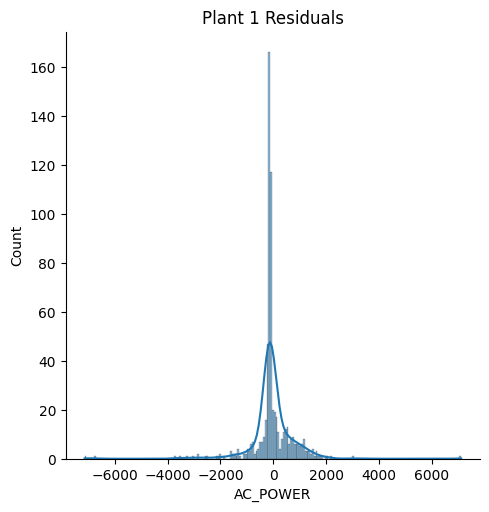

In [97]:
sbn.displot((y_test-predictions1), kde=True)
plt.title('Plant 1 Residuals')

Text(0.5, 1.0, 'Plant 2 Residuals')

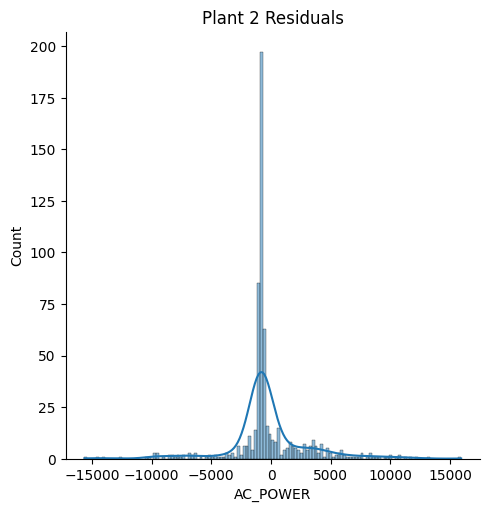

In [98]:
sbn.displot((y2_test-predictions2), kde=True)
plt.title('Plant 2 Residuals')

rgb

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression (existing model)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Compare Mean Squared Errors
print("Linear Regression MSE:", mse_lr)
print("Random Forest Regressor MSE:", mse_rf)


Linear Regression MSE: 442412.7902834776
Random Forest Regressor MSE: 330609.4080779015


In [101]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 574.9864416470197


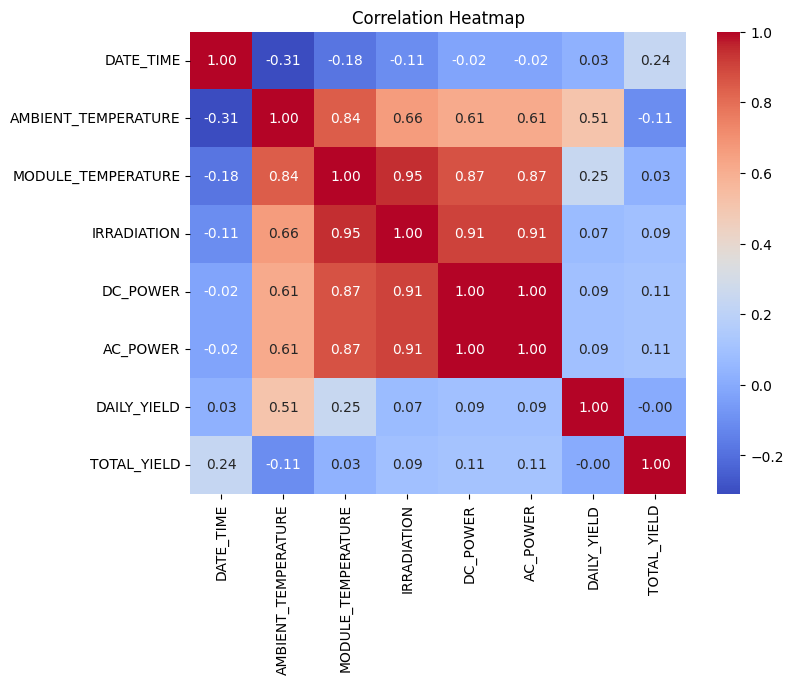

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(mergedata2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

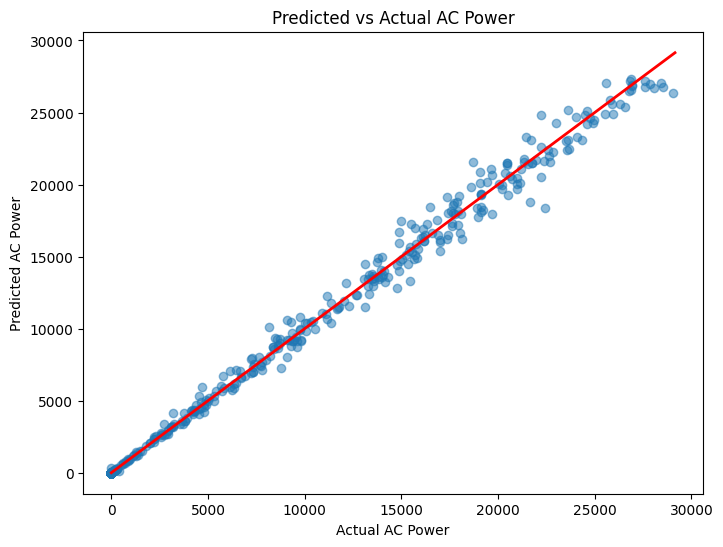

In [106]:
import matplotlib.pyplot as plt

y_pred = rf.predict(X2)  
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual AC Power')
plt.ylabel('Predicted AC Power')
plt.title('Predicted vs Actual AC Power')
plt.show()

In [9]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('Plant_1_generation_data.csv', index_col='DATE_TIME', parse_dates=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['AC_POWER'].values.reshape(-1, 1))

X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=32)

prediction = model.predict(X_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9020\1550020439.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('Plant_1_generation_data.csv', index_col='DATE_TIME', parse_dates=True)
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - loss: 0.0037
Epoch 2/5
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0019
Epoch 3/5
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - loss: 0.0018
Epoch 4/5
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.0018
Epoch 5/5
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 0.0018
2148/2148 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step


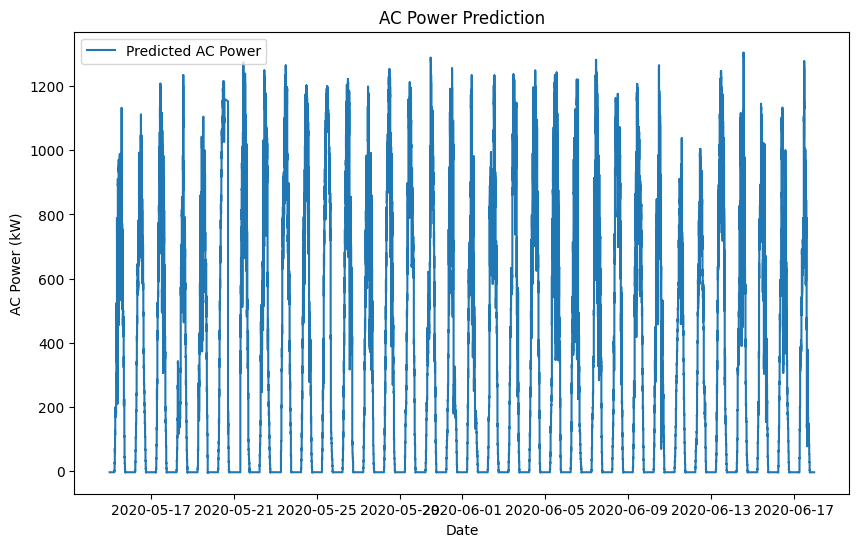

In [10]:
predicted_ac_power = scaler.inverse_transform(prediction)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(data.index[60:], predicted_ac_power, label='Predicted AC Power')
plt.title('AC Power Prediction')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()

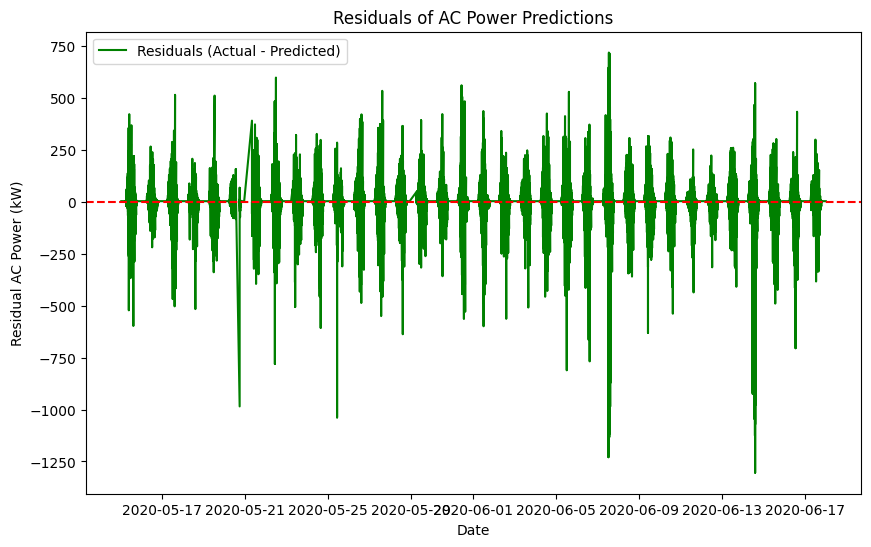

In [13]:
residuals = y_train_original - predicted_ac_power

plt.figure(figsize=(10,6))
plt.plot(data.index[60:], residuals, color='green', label='Residuals (Actual - Predicted)')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of AC Power Predictions')
plt.xlabel('Date')
plt.ylabel('Residual AC Power (kW)')
plt.legend()
plt.show()


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

generation_data = pd.read_csv('Plant_1_generation_data.csv')
sensor_data = pd.read_csv('Plant_1_Weather_sensor_data.csv')

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'])

merged_data = pd.merge(generation_data, sensor_data, on='DATE_TIME', how='inner')

irradiance_threshold = 0.5
high_temp_threshold = 40

sunny_data = merged_data[(merged_data['IRRADIATION'] > irradiance_threshold) & (merged_data['AMBIENT_TEMPERATURE'] < high_temp_threshold)]

X = sunny_data[['IRRADIATION', 'AMBIENT_TEMPERATURE']]
y = sunny_data['AC_POWER']

model = LinearRegression()
model.fit(X, y)

merged_data['EXPECTED_GENERATION'] = model.predict(merged_data[['IRRADIATION', 'AMBIENT_TEMPERATURE']])

merged_data['CLEANING_NEEDED'] = merged_data['AC_POWER'] < (merged_data['EXPECTED_GENERATION'] * 0.9)

cleaning_alerts = merged_data[merged_data['CLEANING_NEEDED'] == True]
print(cleaning_alerts[['DATE_TIME', 'AC_POWER', 'EXPECTED_GENERATION']],)



                DATE_TIME  AC_POWER  EXPECTED_GENERATION
0     2020-05-15 00:00:00       0.0           179.208440
1     2020-05-15 00:00:00       0.0           179.208440
2     2020-05-15 00:00:00       0.0           179.208440
3     2020-05-15 00:00:00       0.0           179.208440
4     2020-05-15 00:00:00       0.0           179.208440
...                   ...       ...                  ...
68769 2020-06-17 23:45:00       0.0           183.024861
68770 2020-06-17 23:45:00       0.0           183.024861
68771 2020-06-17 23:45:00       0.0           183.024861
68772 2020-06-17 23:45:00       0.0           183.024861
68773 2020-06-17 23:45:00       0.0           183.024861

[49900 rows x 3 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_9020\1392918572.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])


Loading data...


C:\Users\DELL\AppData\Local\Temp\ipykernel_100456\2097713529.py:17: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID             68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   SOURCE_KEY_y         68774 non-null  object        
 8   AMBIENT_TEMPERATURE  68774 non-null  float64       
 9   MODULE_TEMPERATURE   68774 non-null  float64       
 10  IRRADIATION          68774 non-null  float64       
 11  hour                 68774 non-null  int32         
 12  month                68774 non-null  int32         
 13  day_of_week     

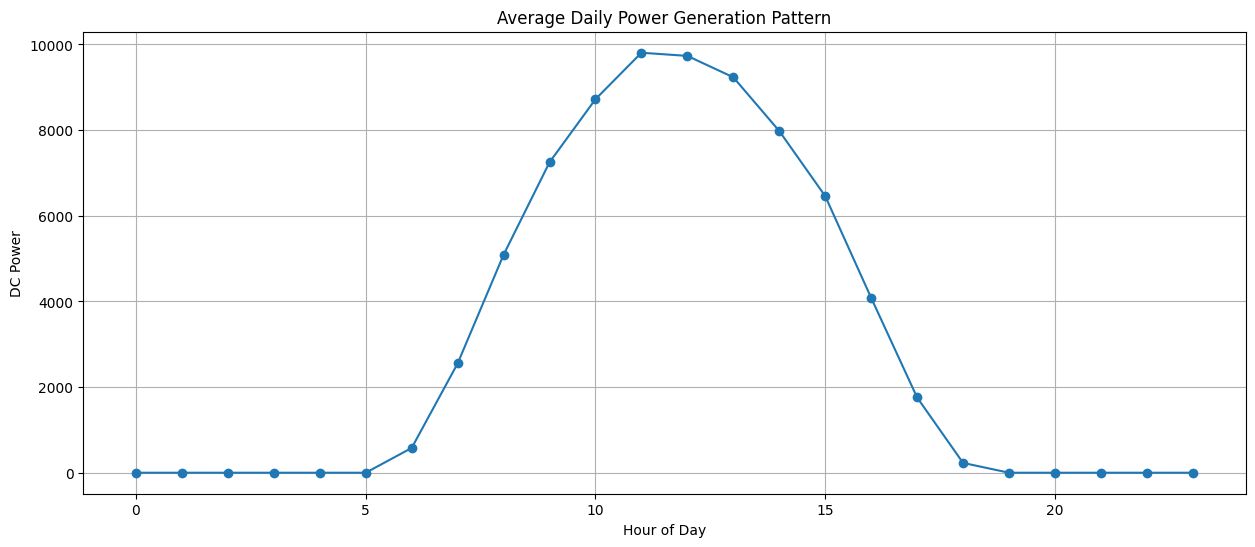

In [2]:

print("Loading data...")
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

data = pd.merge(generation_data, weather_data, 
               on=['DATE_TIME', 'PLANT_ID'],
               how='inner')

data['hour'] = data['DATE_TIME'].dt.hour
data['month'] = data['DATE_TIME'].dt.month
data['day_of_week'] = data['DATE_TIME'].dt.dayofweek

print("\nDataset Info:")
print(data.info())

print("\nSample of merged data:")
print(data.head())

plt.figure(figsize=(15, 6))
daily_power = data.groupby('hour')['DC_POWER'].mean()
plt.plot(daily_power.index, daily_power.values, marker='o')
plt.title('Average Daily Power Generation Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('DC Power')
plt.grid(True)
plt.show()

In [3]:
print("\nTraining power prediction model...")
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
           'hour', 'month', 'day_of_week']
X = data[features]
y = data['DC_POWER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance:")
print(f"R2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


Training power prediction model...

Model Performance:
R2 Score: 0.986
RMSE: 469.24


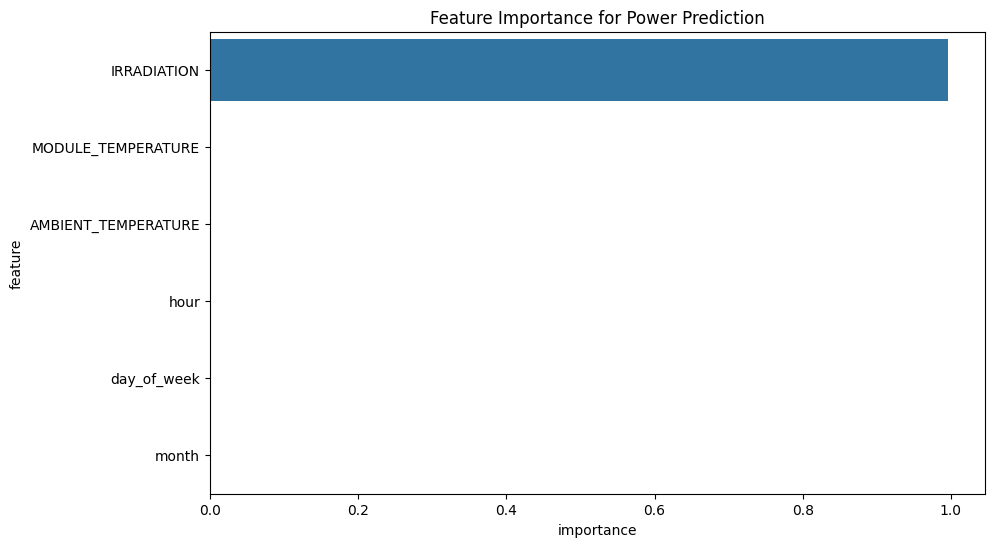

In [5]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Power Prediction')
plt.show()

In [6]:
expected_power = model.predict(X)
data['power_ratio'] = data['DC_POWER'] / (expected_power + 1e-6)

In [11]:
if 'SOURCE_KEY_x' in data.columns:
    group_key = 'SOURCE_KEY_x'
elif 'SOURCE_KEY_y' in data.columns:
    group_key = 'SOURCE_KEY_y'
else:
    print("\nAvailable columns in merged dataset:")
    print(data.columns)
    group_key = 'PLANT_ID'

data['power_ratio_ma'] = data.groupby(group_key)['power_ratio'].transform(
    lambda x: x.rolling(window=48, min_periods=1).mean()
)

In [12]:
cleaning_threshold = 0.85
cleaning_needs = data[data['power_ratio_ma'] < cleaning_threshold][
    ['DATE_TIME', group_key, 'power_ratio_ma']
].drop_duplicates()

print("\nPanels potentially needing cleaning:")
print(cleaning_needs.head())


Panels potentially needing cleaning:
   DATE_TIME     SOURCE_KEY_x  power_ratio_ma
0 2020-05-15  1BY6WEcLGh8j5v7             0.0
1 2020-05-15  1IF53ai7Xc0U56Y             0.0
2 2020-05-15  3PZuoBAID5Wc2HD             0.0
3 2020-05-15  7JYdWkrLSPkdwr4             0.0
4 2020-05-15  McdE0feGgRqW7Ca             0.0


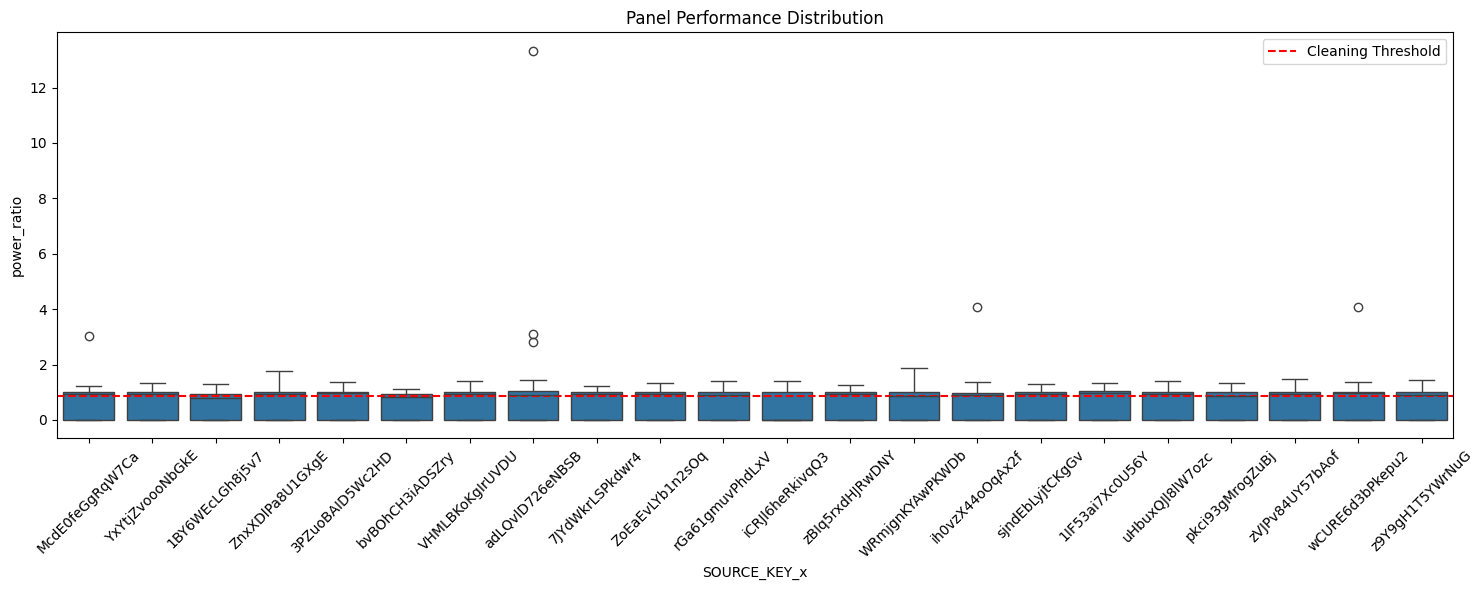

In [13]:
plt.figure(figsize=(15, 6))
sample_data = data.sample(n=min(10000, len(data)))
sns.boxplot(x=group_key, y='power_ratio', data=sample_data)
plt.xticks(rotation=45)
plt.title('Panel Performance Distribution')
plt.axhline(y=cleaning_threshold, color='r', linestyle='--', label='Cleaning Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
panel_stats = data.groupby(group_key).agg({
    'DC_POWER': ['mean', 'std'],
    'power_ratio': ['mean', 'std']
}).reset_index()

# Flatten column names
panel_stats.columns = [group_key, 'power_mean', 'power_std', 
                      'ratio_mean', 'ratio_std']

# Identify outliers (3 standard deviations)
std_dev_threshold = 3
power_mean_std = panel_stats['power_mean'].std()
ratio_mean_std = panel_stats['ratio_mean'].std()

faulty_panels = panel_stats[
    (abs(panel_stats['power_mean'] - panel_stats['power_mean'].mean()) > 
     std_dev_threshold * power_mean_std) |
    (abs(panel_stats['ratio_mean'] - panel_stats['ratio_mean'].mean()) > 
     std_dev_threshold * ratio_mean_std)
]

print("\nPotentially faulty panels:")
print(faulty_panels)


Potentially faulty panels:
       SOURCE_KEY_x   power_mean    power_std  ratio_mean  ratio_std
11  bvBOhCH3iADSZry  2828.998291  3698.531647    0.484497   0.463254


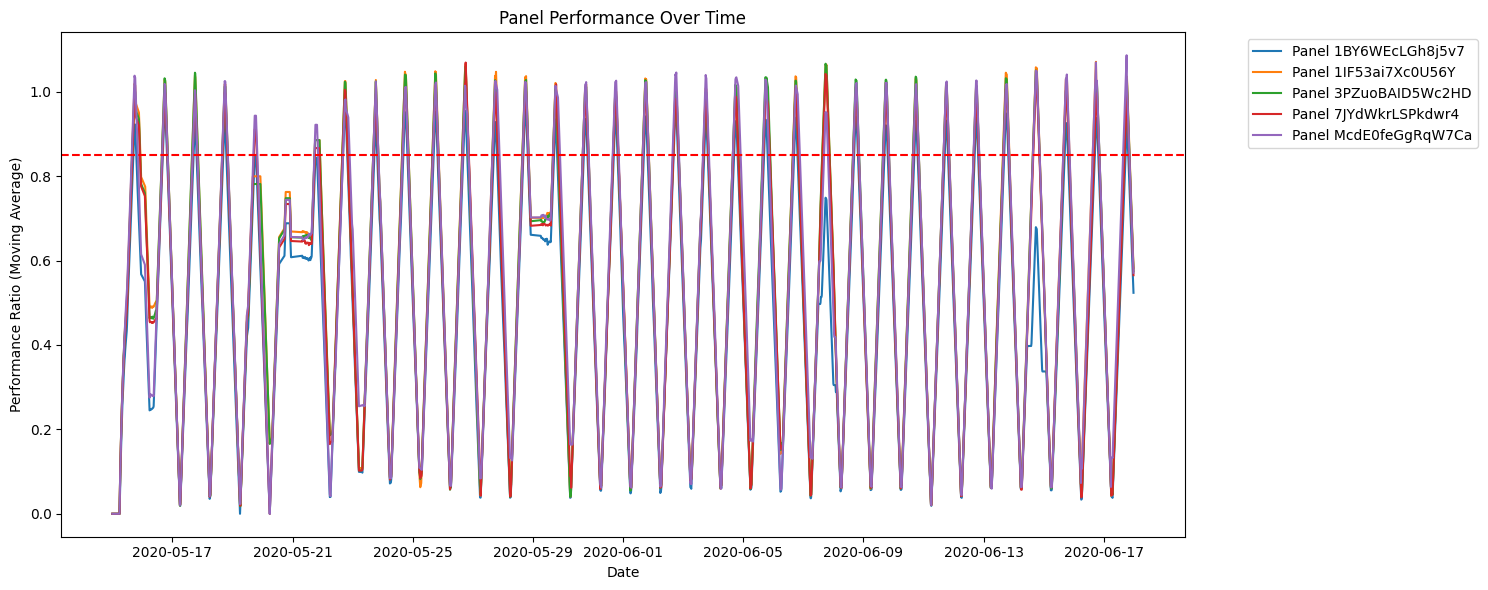

In [15]:
plt.figure(figsize=(15, 6))
for source_key in data[group_key].unique()[:5]:  # Plot first 5 panels
    panel_data = data[data[group_key] == source_key]
    plt.plot(panel_data['DATE_TIME'], panel_data['power_ratio_ma'], 
             label=f'Panel {source_key}')

plt.title('Panel Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Performance Ratio (Moving Average)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=cleaning_threshold, color='r', linestyle='--', label='Cleaning Threshold')
plt.tight_layout()
plt.show()
